In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SqlAlquemySelectMarketDataHandler import SqlAlquemySelectMarketDataHandler

from dotenv import load_dotenv
load_dotenv()

import yfinance as yf

In [2]:
# Selected most important countries that 
# covers 94-96% of total weight of MSCI ACWI in years 1999 - 2024

selected_countries = [
    'United States', 'Japan', 'United Kingdom', 
    'Canada', 'France', 'Switzerland', 'Germany', 
    'Australia', 'Netherlands', 'Sweden', 
    'Hong Kong', 'Spain', 'Italy', 
    'China', 'Taiwan', 'India', 
    'Korea', 'Brazil', 'Russia']
len(selected_countries)

19

### ETF data in USD from Nasdaq exchange which have the highest coverage

In [3]:
sql_handler = SqlAlquemySelectMarketDataHandler()
etfs_in_usd = sql_handler.read_market_symbols('ETF in USD')

48 market symbols read


In [4]:
etfs = etfs_in_usd[etfs_in_usd['Country'].isin(selected_countries)]
etfs.index = etfs['Country']
etfs

,Code,Description,Country
Country,,,
Russia,ERUS,iShares MSCI Russia ETF,Russia
Australia,EWA,iShares MSCI Australia ETF,Australia
Canada,EWC,iShares MSCI Canada ETF,Canada
Sweden,EWD,iShares MSCI Sweden ETF,Sweden
Germany,EWG,iShares MSCI Germany ETF,Germany
Hong Kong,EWH,iShares MSCI Hong Kong ETF,Hong Kong
Italy,EWI,iShares MSCI Italy ETF,Italy
Japan,EWJ,iShares MSCI Japan ETF,Japan
Switzerland,EWL,iShares MSCI Switzerland ETF,Switzerland


In [8]:
df_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                       columns=selected_countries)

for country in selected_countries:
    symbol = etfs.loc[country]['Code']
    df_etfs.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
6315 market data read
3235 market data read
5943 market data read
3022 market data read
5972 market data read
5929 market data read
3333 market data read


In [64]:
df_etfs = df_etfs.astype(float).round(2)
df_etfs

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,Hong Kong,Spain,Italy,China,Taiwan,India,Korea,Brazil,Russia
1999-01-04,78.57,28.45,16.07,5.85,11.39,11.48,12.74,3.45,14.50,7.73,4.62,13.38,21.46,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,79.47,28.28,16.21,5.94,11.45,11.64,12.61,3.45,14.70,7.87,4.62,13.72,21.74,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,81.39,28.63,16.90,6.28,11.70,11.89,13.62,3.56,14.97,7.97,4.84,13.98,22.25,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,80.99,28.80,16.60,6.19,11.61,11.81,12.68,3.63,14.53,8.04,4.90,13.46,21.56,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,81.59,28.80,16.51,6.28,11.42,11.81,12.71,3.63,14.36,7.95,5.00,13.22,21.42,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,473.65,63.33,32.92,36.43,39.13,47.45,29.52,24.24,44.25,39.43,16.97,30.49,33.75,39.29,44.47,48.36,63.97,34.62,8.06
2023-12-26,475.65,63.31,33.09,36.83,39.37,47.70,29.69,24.44,44.66,39.60,17.01,30.69,34.00,39.57,45.41,48.53,64.27,35.15,8.06
2023-12-27,476.51,63.66,33.22,36.87,39.51,48.07,29.86,24.56,44.87,39.93,17.12,30.81,34.15,39.53,45.86,48.84,64.85,35.27,8.06
2023-12-28,476.69,64.04,33.05,36.70,39.13,47.86,29.66,24.49,44.64,39.75,17.35,30.58,33.92,40.46,46.03,49.02,65.98,35.11,8.06


In [10]:
for country in df_etfs.columns:    
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

China 2011-03-31 00:00:00
Taiwan 2000-06-23 00:00:00
India 2012-02-03 00:00:00
Korea 2000-05-12 00:00:00
Brazil 2000-07-14 00:00:00
Russia 2010-11-09 00:00:00


In [11]:
for country in df_etfs.columns:
    last_valid = df_etfs[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Stock indices for missing data

In [12]:
stock_indices = sql_handler.read_market_symbols('Stock Index')
stock_indices = stock_indices[stock_indices['Country'].isin(selected_countries)]
stock_indices.index = stock_indices['Country']
stock_indices

45 market symbols read


,Code,Description,Country
Country,,,
Netherlands,^AEX,AEX,Netherlands
Australia,^AXJO,S&P/ASX 200,Australia
India,^BSESN,S&P BSE Sensex,India
Brazil,^BVSP,BOVESPA,Brazil
France,^FCHI,CAC 40,France
United Kingdom,^FTSE,FTSE 100,United Kingdom
Germany,^GDAXI,DAX,Germany
United States,^GSPC,S&P 500,United States
Canada,^GSPTSE,S&P/TSX,Canada


In [58]:
df_stock_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                columns=selected_countries)

for country in selected_countries:
    symbol = stock_indices.loc[country]['Code']
    df_stock_indices.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read
6542 market data read


In [65]:
df_stock_indices = df_stock_indices.astype(float).round(2)
df_stock_indices

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,Hong Kong,Spain,Italy,China,Taiwan,India,Korea,Brazil,Russia
1999-01-04,1228.10,13415.89,5879.4,6554.3,4147.50,7441.80,5290.36,2732.2,558.95,727.10,9809.17,10447.79,37703.0,1125.82,6152.41,3122.04,587.57,6942.0,45.60
1999-01-05,1244.78,13232.74,5958.2,6660.5,4200.78,7545.80,5263.41,2716.6,566.51,736.09,9891.06,10650.69,38179.0,1119.96,6152.41,3149.06,576.78,7111.0,45.60
1999-01-06,1272.34,13468.46,6148.8,6805.3,4294.82,7668.80,5442.90,2755.6,583.66,736.09,10233.80,10650.69,38179.0,1132.59,6199.89,3205.68,612.36,7331.0,46.79
1999-01-07,1269.73,13536.56,6101.2,6802.2,4230.67,7549.70,5345.71,2800.4,561.08,739.81,10693.57,10443.39,38323.0,1137.73,6404.29,3299.09,637.59,6954.0,46.79
1999-01-08,1275.09,13391.81,6147.2,6868.9,4245.42,7633.70,5370.51,2757.4,559.27,738.71,10722.70,10412.29,38130.0,1168.81,6421.73,3397.84,626.33,6781.0,46.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4754.63,33254.03,7697.5,20881.2,7568.82,11153.09,16706.18,7501.6,785.45,2377.05,16340.41,10111.90,30353.0,2918.81,17604.84,71106.96,2599.51,132753.0,3092.58
2023-12-26,4774.75,33305.85,7725.0,21015.9,7571.82,11113.98,16742.07,7561.2,786.84,2390.28,16624.84,10121.80,30422.0,2898.88,17751.73,71336.80,2602.59,133533.0,3094.72
2023-12-27,4781.58,33681.24,7725.0,21015.9,7571.82,11113.98,16742.07,7561.2,786.84,2390.28,16624.84,10121.80,30422.0,2914.61,17891.50,72038.43,2613.50,134194.0,3097.49
2023-12-28,4783.35,33539.62,7722.7,20929.4,7535.16,11057.55,16701.55,7614.3,787.04,2389.01,17043.53,10086.20,30331.0,2954.70,17910.37,72410.38,2655.28,134185.0,3101.99


In [60]:
for country in df_stock_indices.columns:    
    first_valid = df_stock_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

In [61]:
for country in df_stock_indices.columns:
    last_valid = df_stock_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

In [62]:
df_stock_indices = df_stock_indices.dropna()
df_stock_indices

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,Hong Kong,Spain,Italy,China,Taiwan,India,Korea,Brazil,Russia
1999-01-04,1228.1000,13415.8900,5879.4000,6554.3000,4147.5000,7441.8000,5290.3600,2732.2000,558.9500,727.1000,9809.1700,10447.7900,37703.0000,1125.8200,6152.4100,3122.0400,587.5700,6942.0000,45.6000
1999-01-05,1244.7800,13232.7400,5958.2000,6660.5000,4200.7800,7545.8000,5263.4100,2716.6000,566.5100,736.0900,9891.0600,10650.6900,38179.0000,1119.9600,6152.4100,3149.0600,576.7800,7111.0000,45.6000
1999-01-06,1272.3400,13468.4600,6148.8000,6805.3000,4294.8200,7668.8000,5442.9000,2755.6000,583.6600,736.0900,10233.8000,10650.6900,38179.0000,1132.5900,6199.8900,3205.6800,612.3600,7331.0000,46.7900
1999-01-07,1269.7300,13536.5600,6101.2000,6802.2000,4230.6700,7549.7000,5345.7100,2800.4000,561.0800,739.8100,10693.5700,10443.3900,38323.0000,1137.7300,6404.2900,3299.0900,637.5900,6954.0000,46.7900
1999-01-08,1275.0900,13391.8100,6147.2000,6868.9000,4245.4200,7633.7000,5370.5100,2757.4000,559.2700,738.7100,10722.7000,10412.2900,38130.0000,1168.8100,6421.7300,3397.8400,626.3300,6781.0000,46.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4754.6300,33254.0300,7697.5000,20881.2000,7568.8200,11153.0900,16706.1800,7501.6000,785.4500,2377.0500,16340.4100,10111.9000,30353.0000,2918.8100,17604.8400,71106.9600,2599.5100,132753.0000,3092.5800
2023-12-26,4774.7500,33305.8500,7725.0000,21015.9000,7571.8200,11113.9800,16742.0700,7561.2000,786.8400,2390.2800,16624.8400,10121.8000,30422.0000,2898.8800,17751.7300,71336.8000,2602.5900,133533.0000,3094.7200
2023-12-27,4781.5800,33681.2400,7725.0000,21015.9000,7571.8200,11113.9800,16742.0700,7561.2000,786.8400,2390.2800,16624.8400,10121.8000,30422.0000,2914.6100,17891.5000,72038.4300,2613.5000,134194.0000,3097.4900
2023-12-28,4783.3500,33539.6200,7722.7000,20929.4000,7535.1600,11057.5500,16701.5500,7614.3000,787.0400,2389.0100,17043.5300,10086.2000,30331.0000,2954.7000,17910.3700,72410.3800,2655.2800,134185.0000,3101.9900


### Compare indices with etfs

In [126]:
currency_codes = {
    'China': 'CNY',  # Chinese Yuan
    'Taiwan': 'TWD',  # New Taiwan Dollar
    'India': 'INR',  # Indian Rupee
    'Korea': 'KRW',  # South Korean Won
    'Brazil': 'BRL',  # Brazilian Real
    'Russia': 'RUB'  # Russian Ruble
}

In [130]:
def compare_data(country, norm_date):
    plt.figure(figsize=(20,6))
    
    currency_code = currency_codes[country]
    currency_rate = yf.download(f'{currency_code}USD=X', '1999-01-04', '2023-12-29')
    currency_rate = currency_rate['Adj Close']
    currency_rate = pd.Series(
        index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
        data=currency_rate)
    currency_rate = currency_rate.ffill()
    currency_rate = currency_rate.bfill()

    index_adj = df_stock_indices[country]*currency_rate
    index_adj_norm = index_adj/index_adj[norm_date]
    index_adj_norm = index_adj_norm.round(2)
    plt.plot(index_adj_norm, label='Index currency adj')

    index = df_stock_indices[country]
    index_norm = index/index[norm_date]
    index_norm = index_norm.round(2)
    plt.plot(index_norm, label='Index')

    etf = df_etfs[country]
    etf_norm = etf/etf[norm_date]
    etf_norm = etf_norm.round(2)
    plt.plot(etf_norm, label='ETF')

    plt.legend()
    plt.show()

China 2011-03-31 00:00:00
[*********************100%%**********************]  1 of 1 completed


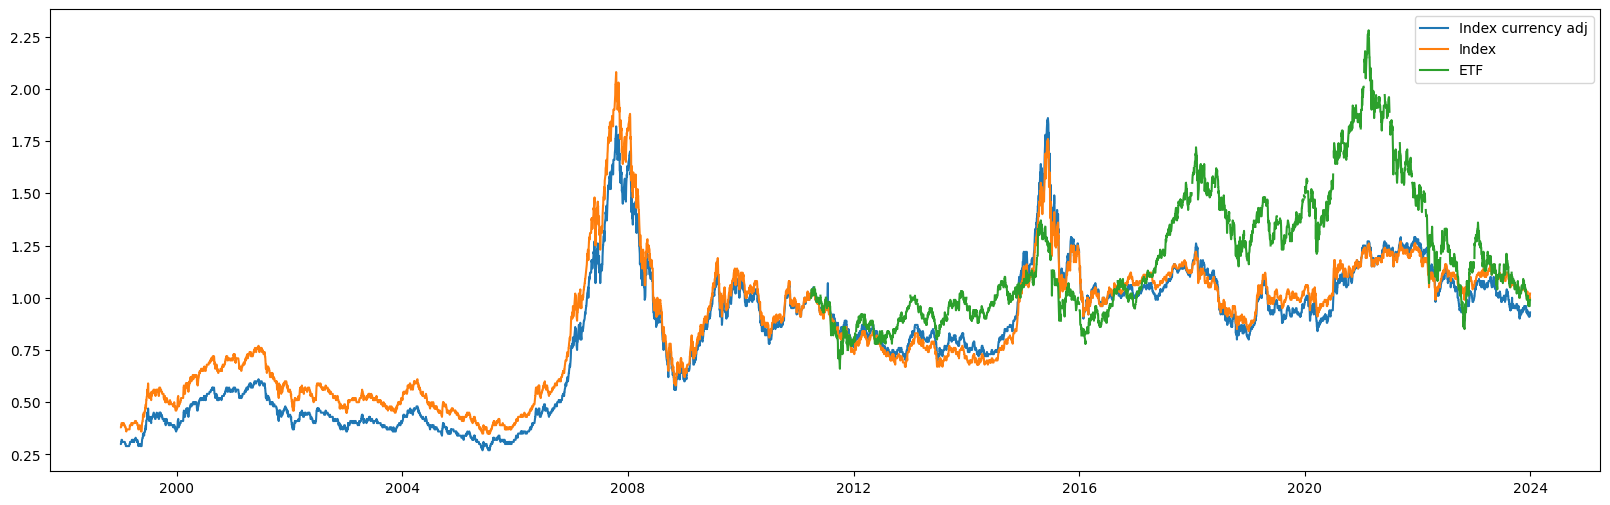

Taiwan 2000-06-23 00:00:00
[*********************100%%**********************]  1 of 1 completed


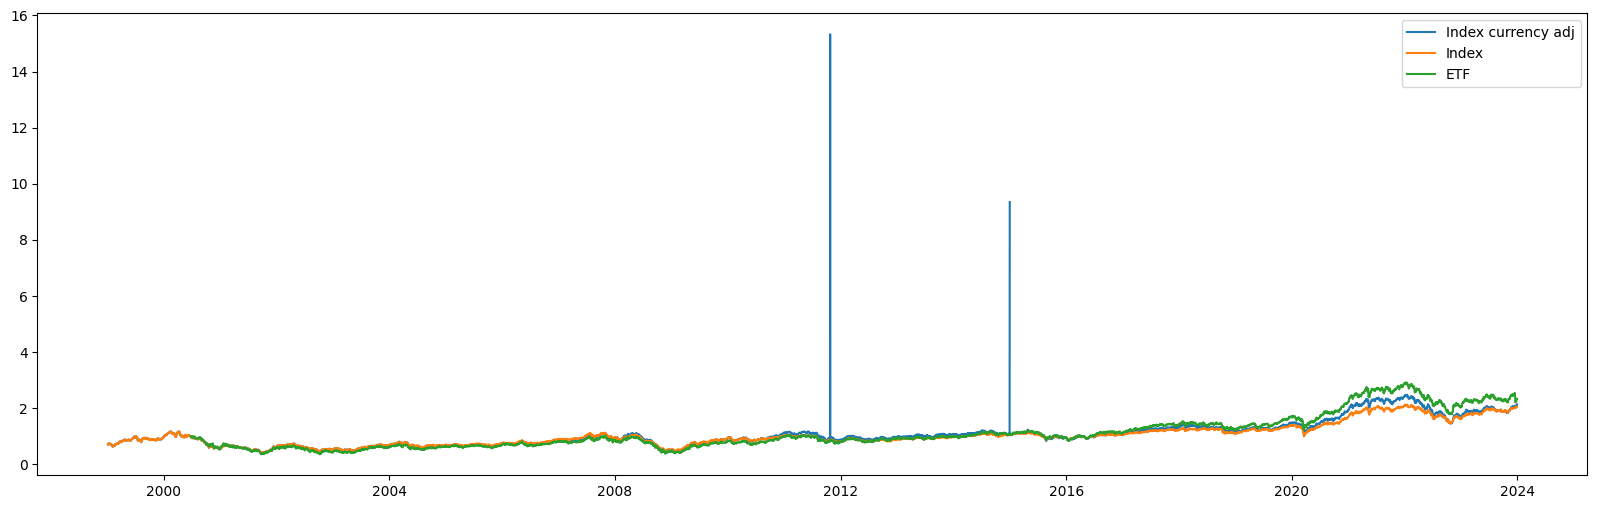

India 2012-02-03 00:00:00
[*********************100%%**********************]  1 of 1 completed


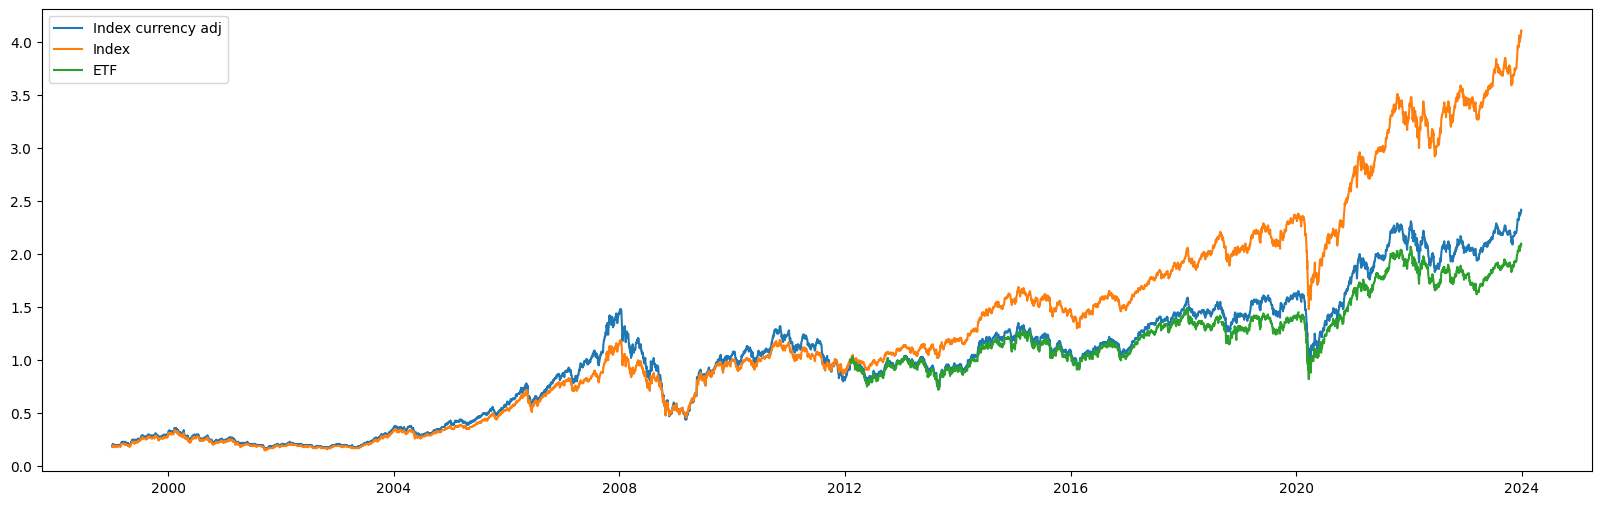

Korea 2000-05-12 00:00:00
[*********************100%%**********************]  1 of 1 completed


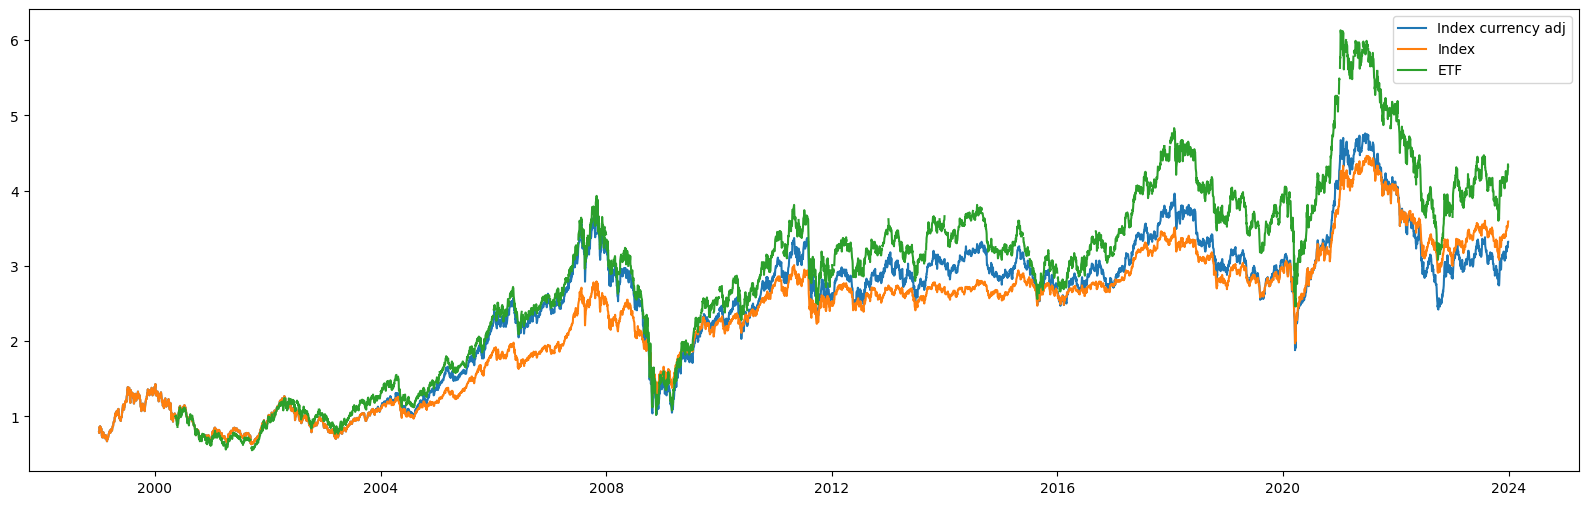

Brazil 2000-07-14 00:00:00
[*********************100%%**********************]  1 of 1 completed


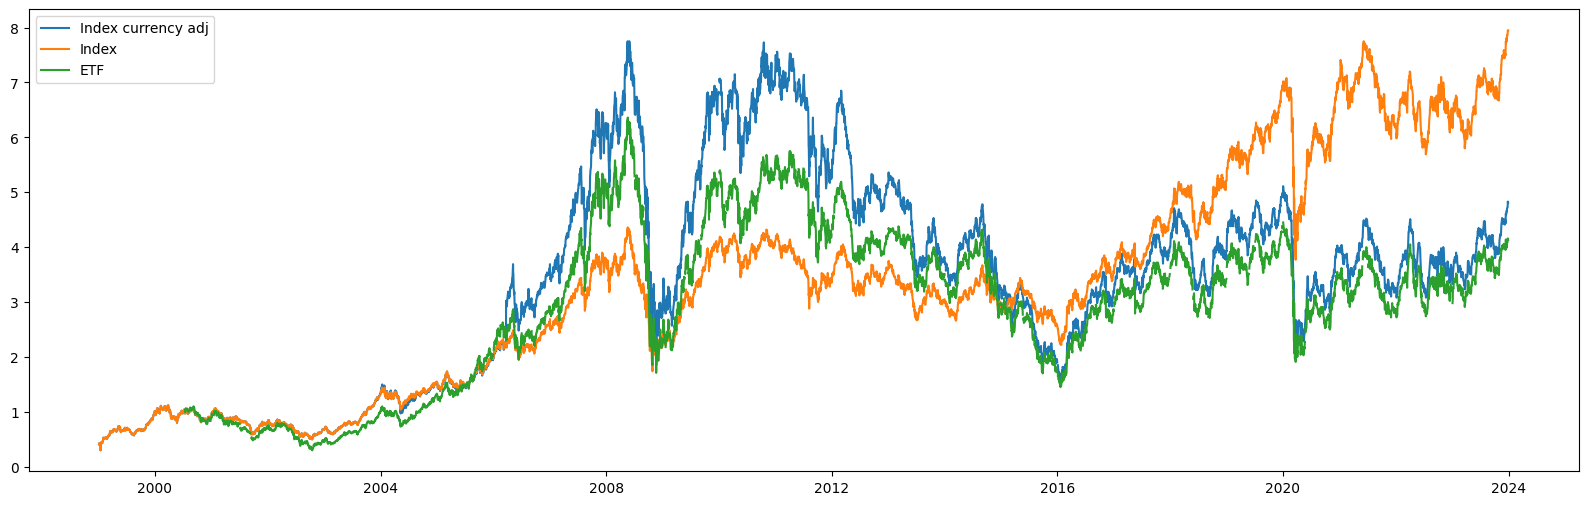

Russia 2010-11-09 00:00:00
[*********************100%%**********************]  1 of 1 completed


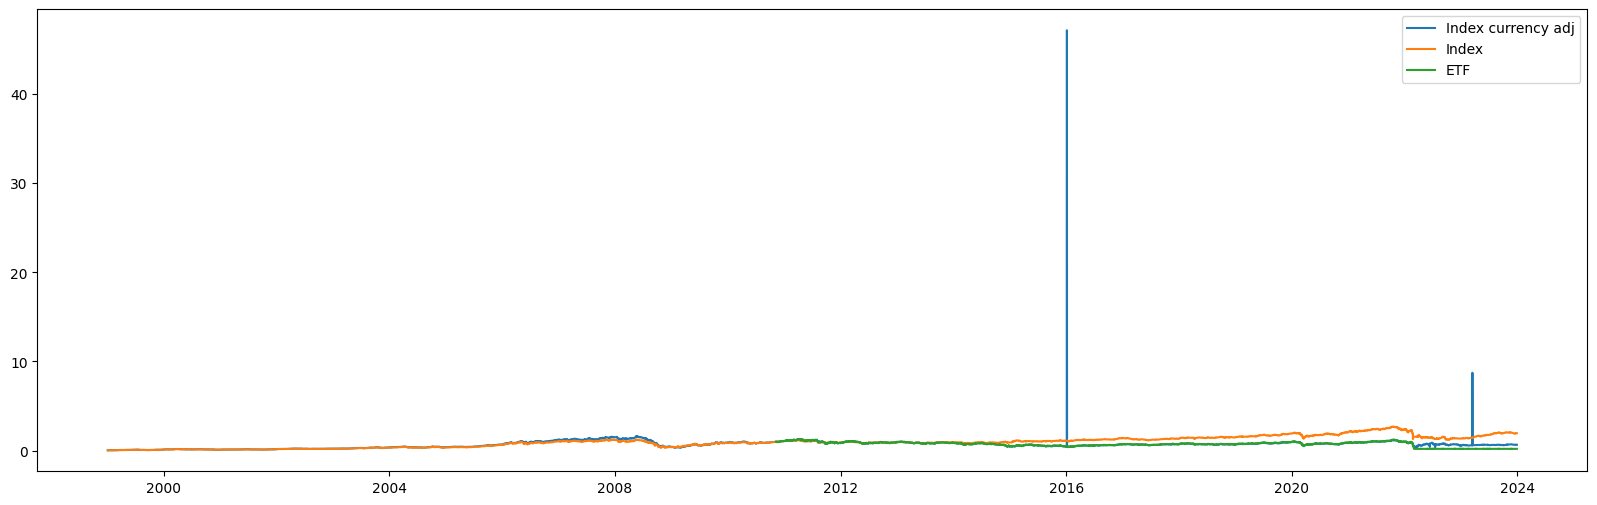

In [131]:
# Countries that would need to fill missing ETF data

for country in df_etfs.columns:
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)
        compare_data(country, first_valid)